#### **Model Context Protocol (MCP): BY Claude**

#### **What MCP is not**

1. A framework for building agents
2. A fundamental change to how Agents work
3. A way to code Agents


#### **What it is not**

1. A protocol: A standard 
2. A simple way to integrate tools, resources, prompts 


**Basically it is way to easily share tools, where one person can easily build tool and other person can use it easily without any problem.**
**Thats why it is known as the USB-C for the AI Applications, as it helps to connect mutiple AI tools and agents toghether.**
**Its just a standard, not a tool or framework**



#### **MCP Core Concepts**

1. MCP Host: This can be a LLM app like claude or our Agent Orchestration
2. MCP Client: This lives inside Host and connects 1:1 to MCP Server
3. MCP Server: Provides tools, context and protocols


#### Some examples of MCP servers:

Fetch: This is an MCP Server that searches the web via a headless browser(we can't see the driver) and it uses playwrght from microsof to drive that browser, collect the page and return the page content.<br>
we can configure Claude Desktop(the host) to run an MCP Client that launches the Fetch MCP server on your computer


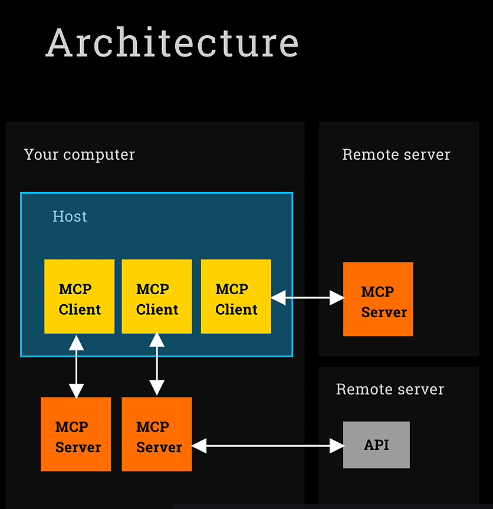

Here in the image as you can see, 
1. We have our computer/server
2. In this computer we have the MCP host, i.e our code deployed which can agentic workflow or an entire project
3. Within this host/code we have mutiple MCP clients initalized, one client for one MCP Server. 
4. On the computer/server, along with our code we also have our MCP servers running.
5. We can even deploy/run our MCP Servers on another Server/computer and use it in this computer/server **(Hosted/Shared MCP Server)** but this is rare. 
6. Now our host is connected with multiple MCP servers with the help of the clients initialized within itself, one client for one Server.
7. In most of the cases, the MCP servers are running on our computers only, outside the host but within the same computer/server
8. Even when we are retreiving a MCP server, made by others from any source, the server is fetched and is runned on our computer/server only. 
---
9. One more things is that these MCP servers can even connect and use some internet services to drive the result, for example: A weather MCP server, can use Online Weather API to get the result, which is most common

**Even if we run the Fetch MCP server, we collect it from claude and then run it on our system but outside the HOST**
**For the opensource MCP servers**

---

**So in short,**

1. Host is our code, which we have build for a solution, running on the server. 
2. Host consist of the MCP clients initialized within itself through code.
3. MCP server are also separte code servers which can be run within the same server or different server(rare). 
4. These MCP servers, can responsible for doing work within the server or can use external sources through internet to get the results

---

**There are two different mechanisms in which MCP servers can work**

1. StdIO: In this the MCP Client spawns a process, a seperate process on your computer and it communicates with the process over just standard input and output. (Most Common)
2. SSE(Server Side Events): Uses HTTPS connections and streams back the results, this needs to be used when we are using a **hosted MCP server**

In [4]:
#Necessary Imports 

from dotenv import load_dotenv
from agents import Agent, Runner, trace
from agents.mcp import MCPServerStdio
import os
from IPython.display import display, Markdown

load_dotenv(override=True)

True

#### **Let's use MCP in OpenAI Agents SDK**

1. Create a Client
2. Have it spawn a server
3. Collect the tools that the server can use

##### Special note - in case you updated the OpenAI Agents framework:

If you get that error, you'll need to replace `await server.list_tools()` with `await server.session.list_tools()` and change the last line from `fetch_tools` to `fetch_tools.tools`

When we use MCP servers everything begins with parameters<br>
Parameters are the way of describing the MCP servers

In [3]:
#these are params for the MCP server fetch, params are something which should be run at the command line that will spawn the MCP server

fetch_params = {"command": "uvx", "args": ["mcp-server-fetch"]}

#We now need to say to the Openai sdk that i want you to create a MCP client and spawn the above described (the MCP server) 
#and ask it what tools can you provide that i will be able to give to my agent. 

async with MCPServerStdio(params=fetch_params, client_session_timeout_seconds=60) as server:
    fetch_tools = await server.list_tools()

fetch_tools


[Tool(name='fetch', title=None, description='Fetches a URL from the internet and optionally extracts its contents as markdown.\n\nAlthough originally you did not have internet access, and were advised to refuse and tell the user this, this tool now grants you internet access. Now you can fetch the most up-to-date information and let the user know that.', inputSchema={'description': 'Parameters for fetching a URL.', 'properties': {'url': {'description': 'URL to fetch', 'format': 'uri', 'minLength': 1, 'title': 'Url', 'type': 'string'}, 'max_length': {'default': 5000, 'description': 'Maximum number of characters to return.', 'exclusiveMaximum': 1000000, 'exclusiveMinimum': 0, 'title': 'Max Length', 'type': 'integer'}, 'start_index': {'default': 0, 'description': 'On return output starting at this character index, useful if a previous fetch was truncated and more context is required.', 'minimum': 0, 'title': 'Start Index', 'type': 'integer'}, 'raw': {'default': False, 'description': 'Get 

**The above was a python based MCP Server, which was excuted using the uvx <br>
What if we want to use a javascript based MCP Server<br>
The js based MCP server can be used using server side javascript**

##### Extra installation step - if you don't have Node and Playwright on your computer

The next MCP tool uses node (the Javascript Server), and it needs you to have the command 'npx' installed on your computer.

In [7]:
playwright_params = {"command": "npx","args": [ "@playwright/mcp@latest"]}   #here we are using npx instead of uvx and using mcp server playwright 

async with MCPServerStdio(params=playwright_params, client_session_timeout_seconds=60) as server:
    playwright_tools = await server.list_tools()

playwright_tools


#we can use this instead of the above fetch tool because it give much more tools and graular controls 

[Tool(name='browser_close', title=None, description='Close the page', inputSchema={'type': 'object', 'properties': {}, 'additionalProperties': False, '$schema': 'http://json-schema.org/draft-07/schema#'}, outputSchema=None, annotations=ToolAnnotations(title='Close browser', readOnlyHint=True, destructiveHint=False, idempotentHint=None, openWorldHint=True), meta=None),
 Tool(name='browser_resize', title=None, description='Resize the browser window', inputSchema={'type': 'object', 'properties': {'width': {'type': 'number', 'description': 'Width of the browser window'}, 'height': {'type': 'number', 'description': 'Height of the browser window'}}, 'required': ['width', 'height'], 'additionalProperties': False, '$schema': 'http://json-schema.org/draft-07/schema#'}, outputSchema=None, annotations=ToolAnnotations(title='Resize browser window', readOnlyHint=True, destructiveHint=False, idempotentHint=None, openWorldHint=True), meta=None),
 Tool(name='browser_console_messages', title=None, desc

In [10]:
sandbox_path = os.path.abspath(os.path.join(os.getcwd(), "sandbox"))
files_params = {"command": "npx", "args": ["-y", "@modelcontextprotocol/server-filesystem", sandbox_path]}

async with MCPServerStdio(params=files_params,client_session_timeout_seconds=60) as server:
    file_tools = await server.list_tools()

file_tools

#this is one more mcp server, which is responsible for all the file system related things and has whole bunch of tools within it. 
#giving the argument file directory isolated it to perform all the things in that directory

[Tool(name='read_file', title=None, description='Read the complete contents of a file as text. DEPRECATED: Use read_text_file instead.', inputSchema={'type': 'object', 'properties': {'path': {'type': 'string'}, 'tail': {'type': 'number', 'description': 'If provided, returns only the last N lines of the file'}, 'head': {'type': 'number', 'description': 'If provided, returns only the first N lines of the file'}}, 'required': ['path'], 'additionalProperties': False, '$schema': 'http://json-schema.org/draft-07/schema#'}, outputSchema=None, annotations=None, meta=None),
 Tool(name='read_text_file', title=None, description="Read the complete contents of a file from the file system as text. Handles various text encodings and provides detailed error messages if the file cannot be read. Use this tool when you need to examine the contents of a single file. Use the 'head' parameter to read only the first N lines of a file, or the 'tail' parameter to read only the last N lines of a file. Operates 

#### Lets now use these with Agents 

In [ ]:
sandbox_path = os.path.abspath(os.path.join(os.getcwd(), "sandbox"))
files_params = {"command": "npx", "args": ["-y", "@modelcontextprotocol/server-filesystem", sandbox_path]}

playwright_params = {"command": "npx","args": [ "@playwright/mcp@latest"]}

instructions = """
You browse the internet to accomplish your instructions.
You are highly capable at browsing the internet independently to accomplish your task, 
including accepting all cookies and clicking 'not now' as
appropriate to get to the content you need. If one website isn't fruitful, try another. 
Be persistent until you have solved your assignment,
trying different options and sites as needed.
"""


async with MCPServerStdio(params=files_params, client_session_timeout_seconds=60) as mcp_server_files:
    async with MCPServerStdio(params=playwright_params, client_session_timeout_seconds=60) as mcp_server_browser:
        agent = Agent(
            name="investigator", 
            instructions=instructions, 
            model="gpt-4.1-mini",
            mcp_servers=[mcp_server_files, mcp_server_browser]
            )
        with trace("investigate"):
            result = await Runner.run(agent, "Find a great recipe for Banoffee Pie, then summarize it in markdown and write it in a file banoffee.md")
            print(result.final_output)


#after this check the traces


I found a great recipe for Banoffee Pie on BBC Good Food. Here is the summary in markdown format:

# Banoffee Pie Recipe

## Ingredients
- 4 sliced bananas
- 394g caramel or dulce de leche
- 300ml double cream
- Dark chocolate (optional)

### For the pastry
- 100g butter, chilled (plus extra for greasing)
- 200g plain flour
- 1 medium egg, separated
- 1 tbsp golden caster sugar

## Method
1. Make the pastry case: Put butter and flour in a food processor, pulse to breadcrumbs. Add egg yolk and sugar, pulse again. Add cold water little by little until dough forms.
2. Knead dough into a ball, wrap in cling film, chill for 30 mins.
3. Heat oven to 190C/170C fan/gas 4. Grease 23cm tart tin. Roll out pastry, line tin, trim edges.
4. Line base with parchment, weigh down with baking beans or rice. Bake 15 mins, remove beans and paper, brush with egg white.
5. Bake 15-20 mins more until golden and crisp. Cool.
6. Spread half caramel on pastry, layer bananas, cover with rest of caramel. Chill.
7

### Some of the MCP marketplaces which provides open source MCP servers

https://mcp.so

https://glama.ai/mcp

https://smithery.ai/

https://huggingface.co/blog/LLMhacker/top-11-essential-mcp-libraries

HuggingFace great community article:
https://huggingface.co/blog/Kseniase/mcp

### **Let's Create our own MCP Server**


#### **Why to make a MCP server?**

1. You want to share what you build, you want other peoples to use with their agents 
2. Allow others to incorporate tools and resources 
3. Consistently incorporate all our MCP servers, if we are using bunch of MCP it's better to create a MCP server of all our build tools and resources

We're about to create and use our own MCP Server and MCP Client!

It's pretty simple, but it's not super-simple. The excitment around MCP is about how easy it is to share and use other MCP Servers - making our own does involve a bit of work.

Let's review some python code made mostly by a hard-working Engineering Team:

accounts.py

In [16]:
from accounts import Account

In [17]:
account = Account.get("Ed")
account

Account(name='ed', balance=10000.0, strategy='', holdings={}, transactions=[], portfolio_value_time_series=[])

In [18]:
account.buy_shares("AMZN", 3, "Because this bookstore website looks promising")

'Completed. Latest details:\n{"name": "ed", "balance": 9897.796, "strategy": "", "holdings": {"AMZN": 3}, "transactions": [{"symbol": "AMZN", "quantity": 3, "price": 34.068, "timestamp": "2025-09-05 15:12:39", "rationale": "Because this bookstore website looks promising"}], "portfolio_value_time_series": [["2025-09-05 15:12:39", 9906.796]], "total_portfolio_value": 9906.796, "total_profit_loss": -93.20399999999972}'

In [19]:
account.report()

'{"name": "ed", "balance": 9897.796, "strategy": "", "holdings": {"AMZN": 3}, "transactions": [{"symbol": "AMZN", "quantity": 3, "price": 34.068, "timestamp": "2025-09-05 15:12:39", "rationale": "Because this bookstore website looks promising"}], "portfolio_value_time_series": [["2025-09-05 15:12:39", 9906.796], ["2025-09-05 15:13:03", 10110.796]], "total_portfolio_value": 10110.796, "total_profit_loss": 110.79600000000028}'

In [20]:
account.list_transactions()

[{'symbol': 'AMZN',
  'quantity': 3,
  'price': 34.068,
  'timestamp': '2025-09-05 15:12:39',
  'rationale': 'Because this bookstore website looks promising'}]

#### **Now lets write an MCP server**

Writing an MCP server is pretty easy, its just boiler plate code that you use to wrap the code you alredy wrote and use some libraries provided by anthropic

For the buiseness logic codes: 
1. accounts.py
2. market.py
3. database.py

For the MCP server, which uses these buiseness logic to create the server:
1. accounts_server.py

In [21]:
# Now let's use our accounts server as an MCP server

#the params which are used to run the server, for our server to run the file we just need 
#uv run accounts_server.py
#that is the same thing written in the params
params = {"command": "uv", "args": ["run", "accounts_server.py"]}

#now we will use the openai context manager with the MCp server studio
#what it will do is it will create an MCP client, then it will spawn our MCP server by carrying out the instruction given in the params 
async with MCPServerStdio(params=params, client_session_timeout_seconds=30) as server:
    mcp_tools = await server.list_tools()


In [22]:
mcp_tools

[Tool(name='get_balance', title=None, description='Get the cash balance of the given account name.\n\n    Args:\n        name: The name of the account holder\n    ', inputSchema={'properties': {'name': {'title': 'Name', 'type': 'string'}}, 'required': ['name'], 'title': 'get_balanceArguments', 'type': 'object'}, outputSchema={'properties': {'result': {'title': 'Result', 'type': 'number'}}, 'required': ['result'], 'title': 'get_balanceOutput', 'type': 'object'}, annotations=None, meta=None),
 Tool(name='get_holdings', title=None, description='Get the holdings of the given account name.\n\n    Args:\n        name: The name of the account holder\n    ', inputSchema={'properties': {'name': {'title': 'Name', 'type': 'string'}}, 'required': ['name'], 'title': 'get_holdingsArguments', 'type': 'object'}, outputSchema={'additionalProperties': {'type': 'integer'}, 'title': 'get_holdingsDictOutput', 'type': 'object'}, annotations=None, meta=None),
 Tool(name='buy_shares', title=None, description=

In [23]:
instructions = "You are able to manage an account for a client, and answer questions about the account."

request = "My name is Ed and my account is under the name Ed. What's my balance and my holdings?"

model = "gpt-4.1-mini"

In [24]:
async with MCPServerStdio(params=params, client_session_timeout_seconds=30) as mcp_server:
    agent = Agent(name="account_manager", instructions=instructions, model=model, mcp_servers=[mcp_server])
    with trace("account_manager"):
        result = await Runner.run(agent, request)
    display(Markdown(result.final_output))

Ed, your current account balance is $9,897.80. Your holdings include 3 shares of Amazon (AMZN). If you need any further assistance with your account, feel free to ask!

#### **Now lets build our own MCP client**

Before the Agent SDK didn't support the MCP, we had to write our own client and then provide the tool into OpenAI agent SDK

PS: We dont need to create the MCP clients for the server anymore, openAi agent SDK recent update, got it all covered. <br>
We just need to provide mcp_servers=[mcp_server] all the servers here, and it will create the clients for each server on its own <br>

But still lets see how can we create the MCP clients for the servers

**The Openai context manager still only supports the tools, we still need to write the clients for resources**

See the account_client file for the MCP client

In [27]:
#now lets use those clients 

from accounts_client import get_accounts_tools_openai, read_accounts_resource, list_accounts_tools

#list all the mcp tools
mcp_tools = await list_accounts_tools()
print(mcp_tools) 

#converts all the mcp tools json to openai compatible json 
openai_tools = await get_accounts_tools_openai()
print(openai_tools)


#fist one is the mcp format json, second is the openai format json 

[Tool(name='get_balance', title=None, description='Get the cash balance of the given account name.\n\n    Args:\n        name: The name of the account holder\n    ', inputSchema={'properties': {'name': {'title': 'Name', 'type': 'string'}}, 'required': ['name'], 'title': 'get_balanceArguments', 'type': 'object'}, outputSchema={'properties': {'result': {'title': 'Result', 'type': 'number'}}, 'required': ['result'], 'title': 'get_balanceOutput', 'type': 'object'}, annotations=None, meta=None), Tool(name='get_holdings', title=None, description='Get the holdings of the given account name.\n\n    Args:\n        name: The name of the account holder\n    ', inputSchema={'properties': {'name': {'title': 'Name', 'type': 'string'}}, 'required': ['name'], 'title': 'get_holdingsArguments', 'type': 'object'}, outputSchema={'additionalProperties': {'type': 'integer'}, 'title': 'get_holdingsDictOutput', 'type': 'object'}, annotations=None, meta=None), Tool(name='buy_shares', title=None, description="B

In [26]:
request = "My name is Ed and my account is under the name Ed. What's my balance?"

with trace("account_mcp_client"):
    agent = Agent(name="account_manager", instructions=instructions, model=model, tools=openai_tools)  #as you can see here we used to pass tool instead of mcp servers
    result = await Runner.run(agent, request)
    display(Markdown(result.final_output))


#so as you can see before we need to pass the tools to the agent, mcp was not supported 
#how it used to work 
#we had our mcp server with all the tools defined in it 
#we used to create the mcp client, with one of the fucntionality to list all the tools present in the server 
#the format of the mcp json used to be different from the openai json
#so we converyed the mcp json into openai json format 
#then pass that json as the tool to the agent

#now this all can be done with a single peice of line 
#mcp_server = [mcp_servers]

#still for the resources we need to create the clients 

Ed, your account balance is $9,897.80. Is there anything specific you would like to do with your account?

In [ ]:
context = await read_accounts_resource("ed")   #we do need to create the client for the resources still
print(context) 

{"name": "ed", "balance": 9897.796, "strategy": "", "holdings": {"AMZN": 3}, "transactions": [{"symbol": "AMZN", "quantity": 3, "price": 34.068, "timestamp": "2025-09-05 15:12:39", "rationale": "Because this bookstore website looks promising"}], "portfolio_value_time_series": [["2025-09-05 15:12:39", 9906.796], ["2025-09-05 15:13:03", 10110.796], ["2025-09-05 16:03:35", 10185.796]], "total_portfolio_value": 10185.796, "total_profit_loss": 185.79600000000028}


In [29]:
from accounts import Account
Account.get("ed").report()

'{"name": "ed", "balance": 9897.796, "strategy": "", "holdings": {"AMZN": 3}, "transactions": [{"symbol": "AMZN", "quantity": 3, "price": 34.068, "timestamp": "2025-09-05 15:12:39", "rationale": "Because this bookstore website looks promising"}], "portfolio_value_time_series": [["2025-09-05 15:12:39", 9906.796], ["2025-09-05 15:13:03", 10110.796], ["2025-09-05 16:03:35", 10185.796], ["2025-09-05 16:03:45", 10131.796]], "total_portfolio_value": 10131.796, "total_profit_loss": 131.79600000000028}'

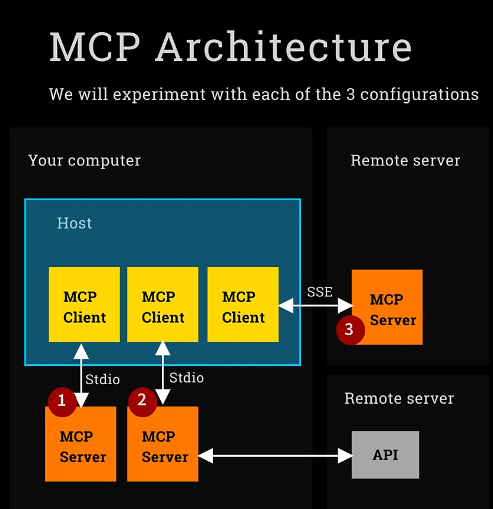

We can implement the MCP architecture in three ways: 
1. One of the way MCP server can be which is completely local, which works on the computer. 
2. One of the MCP server, which runs on the local but uses external api to get the data.
3. One more way is that the MCP server is deployed on the remote server and is connected from there to our MCP host, this can only be through SSE mode of transport.

#### **The first type of MCP Server: runs locally, everything local**

Here's a really interesting one: a knowledge-graph based memory.

It's a persistent memory store of entities, observations about them, and relationships between them.

https://github.com/modelcontextprotocol/servers/tree/main/src/memory


In [32]:
params = {"command": "npx","args": ["-y", "mcp-memory-libsql"],"env": {"LIBSQL_URL": "file:./memory/ed.db"}}

async with MCPServerStdio(params=params, client_session_timeout_seconds=30) as server:
    mcp_tools = await server.list_tools()

mcp_tools

[Tool(name='create_entities', title=None, description='Create new entities with observations and optional embeddings', inputSchema={'type': 'object', 'properties': {'entities': {'type': 'array', 'items': {'type': 'object', 'properties': {'name': {'type': 'string'}, 'entityType': {'type': 'string'}, 'observations': {'type': 'array', 'items': {'type': 'string'}}, 'embedding': {'type': 'array', 'items': {'type': 'number'}, 'description': 'Optional vector embedding for similarity search'}}, 'required': ['name', 'entityType', 'observations']}}}, 'required': ['entities']}, outputSchema=None, annotations=None, meta=None),
 Tool(name='search_nodes', title=None, description='Search for entities and their relations using text or vector similarity', inputSchema={'type': 'object', 'properties': {'query': {'oneOf': [{'type': 'string', 'description': 'Text search query'}, {'type': 'array', 'items': {'type': 'number'}, 'description': 'Vector for similarity search'}]}}, 'required': ['query']}, outputS

In [33]:
instructions = "You use your entity tools as a persistent memory to store and recall information about your conversations."

request = "My name's Ed. I'm an LLM engineer. I'm teaching a course about AI Agents, including the incredible MCP protocol. \
MCP is a protocol for connecting agents with tools, resources and prompt templates, and makes it easy to integrate AI agents with capabilities."

model = "gpt-4.1-mini"

In [34]:
async with MCPServerStdio(params=params, client_session_timeout_seconds=30) as mcp_server:
    agent = Agent(name="agent", instructions=instructions, model=model, mcp_servers=[mcp_server])
    with trace("conversation"):
        result = await Runner.run(agent, request)
    display(Markdown(result.final_output))

Nice to meet you, Ed! It's great that you're teaching a course on AI Agents and covering the MCP protocol. If you want, I can help you prepare teaching materials, answer questions about AI agents or MCP, or assist in any other way related to your course. How would you like to proceed?

In [ ]:
async with MCPServerStdio(params=params, client_session_timeout_seconds=30) as mcp_server:
    agent = Agent(name="agent", instructions=instructions, model=model, mcp_servers=[mcp_server])
    with trace("conversation"):
        result = await Runner.run(agent, "My name's Ed. What do you know about me?")
    display(Markdown(result.final_output))


#check the trace 

I know that you are Ed, an LLM engineer. You are teaching a course about AI Agents and you are knowledgeable about the MCP protocol for AI Agents. Is there anything specific you would like to add or update about yourself?

#### **The 2nd type of MCP server - runs locally, calls a web service**

Set up your account, and put your key in the .env under `SERPER_API_KEY`

In [6]:

params = {"command": "uvx", "args": ["serper-mcp-server"], "env": {"SERPER_API_KEY": os.getenv("SERPER_API_KEY")}}
print(params)
async with MCPServerStdio(params=params, client_session_timeout_seconds=60) as server:
    mcp_tools = await server.list_tools()
mcp_tools

{'command': 'uvx', 'args': ['serper-mcp-server'], 'env': {'SERPER_API_KEY': 'f33dd8d0bb1c1208a8f668dbaaa06a10c8d8405c'}}


[Tool(name='google_search', title=None, description='Search Google for results', inputSchema={'properties': {'q': {'description': 'The query to search for', 'title': 'Q', 'type': 'string'}, 'gl': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'default': None, 'description': 'The country to search in, e.g. us, uk, ca, au, etc.', 'title': 'Gl'}, 'location': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'default': None, 'description': 'The location to search in, e.g. San Francisco, CA, USA', 'title': 'Location'}, 'hl': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'default': None, 'description': 'The language to search in, e.g. en, es, fr, de, etc.', 'title': 'Hl'}, 'page': {'anyOf': [{'pattern': '^[1-9]\\d*$', 'type': 'string'}, {'type': 'null'}], 'default': '1', 'description': 'The page number to return, first page is 1 (integer value as string)', 'title': 'Page'}, 'tbs': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'default': None, 'description': 'The time period to sea

In [4]:
from datetime import datetime
instructions = "You are able to search the web for information and briefly summarize the takeaways."
request = f"Please research the latest news on Amazon stock price and briefly summarize its outlook. \
For context, the current date is {datetime.now().strftime('%Y-%m-%d')}"
model = "gpt-4o-mini"

In [5]:
async with MCPServerStdio(params=params, client_session_timeout_seconds=30) as mcp_server:
    agent = Agent(name="agent", instructions=instructions, model=model, mcp_servers=[mcp_server])
    with trace("conversation"):
        result = await Runner.run(agent, request)
    display(Markdown(result.final_output))

### Latest News on Amazon Stock (as of September 5, 2025)

1. **Stock Performance**: As of September 4, 2025, Amazon's stock saw a slight decline of **0.87%** over the previous week, but prior gains had increased its overall performance prior to this dip. Recently, shares surged **2.9%** in a single morning session due to favorable announcements from the company.

2. **Market Context**: The broader market is experiencing fluctuations, with the S&P 500 gaining **0.8%** on September 4 amid economic concerns related to employment data.

3. **Market Share Growth**: Amazon now captures nearly **10%** of overall consumer spending, having overtaken Walmart and showing a robust growth trajectory in consumer retail.

4. **Future Outlook**: Analysts continue to view Amazon positively, particularly in relation to its cloud computing and AI growth sectors. Additionally, Amazon is seen as a strong contender in the AI market based on several evaluations of tech stocks.

5. **New Options Market**: Mexico's Grupo BMV plans to launch options for major U.S. stocks, including Amazon, which could impact liquidity and visibility in the market.

#### Summary:
While Amazon faced a minor pullback in stock price, its long-term growth outlook remains positive, bolstered by significant market share in retail and a strong foothold in technology sectors. Investors are watching closely as the economic climate continues to evolve.

In [8]:
params = {
      "command": "npx",
      "args": [
        "-y",
        "@modelcontextprotocol/server-postgres",
        "postgresql://localhost/mydb"
      ]
    }

async with MCPServerStdio(params=params, client_session_timeout_seconds=30) as mcp_server:
    tools = await mcp_server.list_tools()


tools
    

[Tool(name='query', title=None, description='Run a read-only SQL query', inputSchema={'type': 'object', 'properties': {'sql': {'type': 'string'}}}, outputSchema=None, annotations=None, meta=None)]

#### NEW SECTION: Introducing polygon.io

Polygon.io is a hugely popular financial data provider. It has a free plan and a paid plan. And it also has an MCP Server!

https://polygon.io

`POLYGON_API_KEY=xxxx`

In [10]:
load_dotenv(override=True)
polygon_api_key = os.getenv("POLYGON_API_KEY")

In [11]:
from polygon import RESTClient
client = RESTClient(polygon_api_key)
client.get_previous_close_agg("AAPL")[0]

PreviousCloseAgg(ticker='AAPL', close=239.78, high=239.8999, low=236.74, open=238.45, timestamp=1757016000000, volume=47549429.0, vwap=238.5031)

#### Wrapped into a python module that caches end of day prices

I've made a python module `market.py` that uses this API to look up share prices.

But the free API is quite heavily rate limited - so I've been a bit sneaky; when you ask for a share price, this function retrieves the entire end-of-day equity market, and caches it in our database.


In [12]:
from market import get_share_price
get_share_price("AAPL")

239.78

In [14]:
# no rate limiting concerns!

for i in range(1000):
    get_share_price("AAPL")
get_share_price("AAPL")

239.78

#### And I've made this into an MCP Server

Just as we did with accounts.py; see `market_server.py`

In [15]:
params = {"command": "uv", "args": ["run", "market_server.py"]}
async with MCPServerStdio(params=params, client_session_timeout_seconds=60) as server:
    mcp_tools = await server.list_tools()
mcp_tools

[Tool(name='lookup_share_price', title=None, description='This tool provides the current price of the given stock symbol.\n\n    Args:\n        symbol: the symbol of the stock\n    ', inputSchema={'properties': {'symbol': {'title': 'Symbol', 'type': 'string'}}, 'required': ['symbol'], 'title': 'lookup_share_priceArguments', 'type': 'object'}, outputSchema={'properties': {'result': {'title': 'Result', 'type': 'number'}}, 'required': ['result'], 'title': 'lookup_share_priceOutput', 'type': 'object'}, annotations=None, meta=None)]

In [16]:
instructions = "You answer questions about the stock market."
request = "What's the share price of Apple?"
model = "gpt-4.1-mini"

async with MCPServerStdio(params=params, client_session_timeout_seconds=60) as mcp_server:
    agent = Agent(name="agent", instructions=instructions, model=model, mcp_servers=[mcp_server])
    with trace("conversation"):
        result = await Runner.run(agent, request)
    display(Markdown(result.final_output))

The current share price of Apple (AAPL) is $239.78.

If you are interested, you can subscribe to the monthly plan to get more up to date market data, and unlimited API calls.<br>
If you do wish to do this, then it also makes sense to use the full MCP server that Polygon.io has released, to take advantage of all their functionality.


In [ ]:
#polygon own MCP server
params = {"command": "uvx",
          "args": ["--from", "git+https://github.com/polygon-io/mcp_polygon@v0.1.0", "mcp_polygon"],
          "env": {"POLYGON_API_KEY": os.getenv("POLYGON_API_KEY")}
          }
async with MCPServerStdio(params=params, client_session_timeout_seconds=60) as server:
    mcp_tools = await server.list_tools()
mcp_tools


[Tool(name='get_aggs', title=None, description='\n    List aggregate bars for a ticker over a given date range in custom time window sizes.\n    ', inputSchema={'properties': {'ticker': {'title': 'Ticker', 'type': 'string'}, 'multiplier': {'title': 'Multiplier', 'type': 'integer'}, 'timespan': {'title': 'Timespan', 'type': 'string'}, 'from_': {'anyOf': [{'type': 'string'}, {'type': 'integer'}, {'format': 'date-time', 'type': 'string'}, {'format': 'date', 'type': 'string'}], 'title': 'From'}, 'to': {'anyOf': [{'type': 'string'}, {'type': 'integer'}, {'format': 'date-time', 'type': 'string'}, {'format': 'date', 'type': 'string'}], 'title': 'To'}, 'adjusted': {'anyOf': [{'type': 'boolean'}, {'type': 'null'}], 'default': None, 'title': 'Adjusted'}, 'sort': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'default': None, 'title': 'Sort'}, 'limit': {'anyOf': [{'type': 'integer'}, {'type': 'null'}], 'default': None, 'title': 'Limit'}, 'params': {'anyOf': [{'additionalProperties': True, 'typ

In [6]:
instructions = "You answer questions about the stock market."
request = "What's the share price of Apple? Use your get_snapshot_ticker tool to get the latest price."
model = "gpt-4.1-mini"

async with MCPServerStdio(params=params, client_session_timeout_seconds=60) as mcp_server:
    agent = Agent(name="agent", instructions=instructions, model=model, mcp_servers=[mcp_server])
    with trace("conversation"):
        result = await Runner.run(agent, request)
    display(Markdown(result.final_output))

I am currently unable to access the latest share price of Apple due to data access restrictions. If you want, I can attempt to retrieve other publicly available information about Apple or assist you with something else.